In [ ]:
import numpy as np
import sklearn as sk
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

KeyboardInterrupt: ignored

In [ ]:
# training data
data_pd = pd.read_csv('MLPsample.txt', delimiter = '\t')
data_pd.head()
print(data_pd.describe())
data_arr = np.array(data_pd)

X = data_arr[0:5463, 0:33]
y = data_arr[0:5463, 33:46]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)


       0.121991232037544  0.182298898696899  ...         2063         2105
count        5463.000000        5463.000000  ...  5463.000000  5463.000000
mean           -0.111227           0.209446  ...  2054.832693  2105.922753
std             0.030994           0.020322  ...    93.558875     2.670732
min            -0.366618          -0.001588  ...  1626.000000  2097.000000
25%            -0.130714           0.207673  ...  2044.000000  2105.000000
50%            -0.113618           0.211689  ...  2055.000000  2106.000000
75%            -0.091735           0.217301  ...  2063.000000  2107.000000
max             0.053250           0.242613  ...  2499.000000  2145.000000

[8 rows x 45 columns]


In [ ]:
print(X_train.shape)

(4097, 33)


In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers.core import Dense
np.random.seed(7)

print('tensorflow version : ', tf.__version__)
print('keras version : ', keras.__version__)

tensorflow version :  2.3.0
keras version :  2.4.3


In [ ]:
model = Sequential()
model.add(Dense(300, input_shape=(33,), activation='relu'))
model.add(Dense((300),input_shape = (33,),activation='relu'))

model.add(Dense((12)))
model.compile(loss='mse', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 300)               10200     
_________________________________________________________________
dense_31 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_32 (Dense)             (None, 12)                3612      
Total params: 104,112
Trainable params: 104,112
Non-trainable params: 0
_________________________________________________________________


Epoch 1/1000
129/129 [==============================] - 0s 3ms/step - loss: 3085.7998 - accuracy: 0.8394 - val_loss: 3696.4551 - val_accuracy: 0.8543
Epoch 2/1000
129/129 [==============================] - 0s 3ms/step - loss: 3225.9229 - accuracy: 0.8501 - val_loss: 2964.0986 - val_accuracy: 0.8426
Epoch 3/1000
129/129 [==============================] - 0s 3ms/step - loss: 2996.8684 - accuracy: 0.8592 - val_loss: 4100.7651 - val_accuracy: 0.8858
Epoch 4/1000
129/129 [==============================] - 0s 3ms/step - loss: 3311.6921 - accuracy: 0.8309 - val_loss: 2956.6729 - val_accuracy: 0.8821
Epoch 5/1000
129/129 [==============================] - 0s 3ms/step - loss: 3048.3665 - accuracy: 0.8533 - val_loss: 2719.2869 - val_accuracy: 0.8594
Epoch 6/1000
129/129 [==============================] - 0s 3ms/step - loss: 2974.5698 - accuracy: 0.8640 - val_loss: 2799.1145 - val_accuracy: 0.8975
Epoch 7/1000
129/129 [==============================] - 0s 3ms/step - loss: 2987.8499 - accuracy: 0.

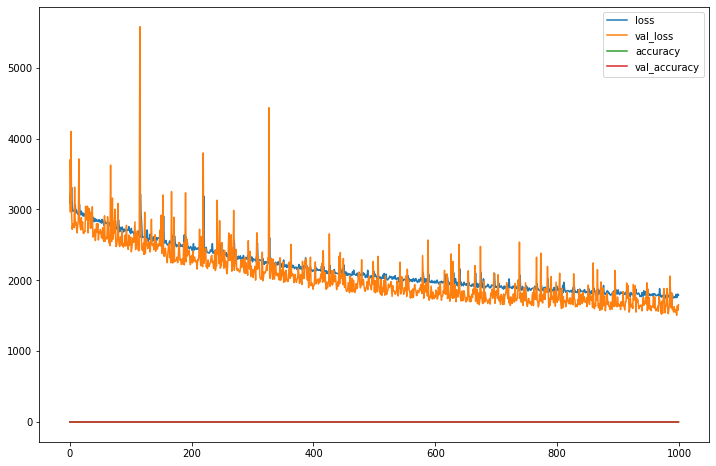

In [ ]:
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000)

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.show()

In [ ]:
aaa = np.array([-0.0462749414145947,	0.331735402345657,	1.8594776391983,	-0.0592971555888653,	0.186049565672874,	1.8183308839798,	-0.055575605481863,0.109857097268105,1.80793750286102,	-0.0438108146190643	,-0.125383883714676	,1.76583087444305	,-0.0272307079285383,	-0.449883580207825,	1.69579029083252,	0.129511713981628	,0.116838730871677,	1.78824102878571,	-0.217892438173294,	0.0482530407607555,	1.74646067619324,	-0.283280462026596,	-0.182979092001915,	1.69028949737549,	0.213805392384529,	0.327415257692337,	1.68292462825775,	-0.253188192844391,	-0.433034658432007,	1.58462989330292,	0.202627807855606,	0.556832373142242,	1.57268750667572]).reshape(1,33)

In [ ]:
model.predict(aaa)

array([[2648.8027, 2227.0378, 1748.9594, 1807.4604, 1843.4103, 2493.4216,
        1842.9891, 2962.3413, 1813.3811, 2003.8651, 1917.6917, 1922.6327]],
      dtype=float32)